In [1]:
#pip install chess
import chess
import math
import time
import chess.svg


In [2]:
import time
from IPython.display import display, HTML, clear_output

In [3]:
def who(player):
    return "White" if player == chess.WHITE else "Black"

In [4]:
def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"
    

In [5]:
def play_game(player1, player2, board, visual="svg", pause=0.5):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    #board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
                
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: rep"
        #http://localhost:8888/tree?token=8e631b7021e06876b0f4689240a98ca41db35e8518237c73msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

In [6]:
import random

def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

In [7]:
def basic_heuristic_player(board):
    moves = list(board.legal_moves)
    for move in moves:
        newboard = board.copy()
        # go through board and return a score
        move.score = heuristic_staticAnalysis(newboard, move, board.turn)
    moves.sort(key=lambda move: move.score, reverse=True) # sort on score
    return moves[0].uci()

def heuristic_staticAnalysis(board, move, my_color):
    score = 0
    ## Check some things about this move:
    # score += 10 if board.is_capture(move) else 0
    # To actually make the move:
    board.push(move)
    # Now check some other things:
    for (piece, value) in [(chess.PAWN, 1), 
                           (chess.BISHOP, 4), 
                           (chess.KING, 0), 
                           (chess.QUEEN, 10), 
                           (chess.KNIGHT, 5),
                           (chess.ROOK, 3)]:
        score += len(board.pieces(piece, my_color)) * value
        score -= len(board.pieces(piece, not my_color)) * value
        # can also check things about the pieces position here
    return score

In [8]:
def human_player(board):
    #display(board)
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci

def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci

In [9]:
#PRINt TREE VERSION

#comp move uses minimax algorithm (chess one)
def compMove(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    
    #keep track of number of first tree nodes
    comp_count = 1
    
    for move in moves:
        newboard = board.copy()
        newboard.push(move)
        
        #to visualise tree 1st move
        #print('comp node number:', comp_count)
        #print('a first comp tree node:')
        #print(newboard)
        comp_count +=1
        #print('current best score:', bestScore)
              
        score = minimax(newboard, 1, False)
        newboard = board.copy()

        if (score > bestScore):
            bestScore = score
            bestMove = move
            
    return bestMove.uci()

#defines minimax algorithm
def minimax(board, depth, isMaximizing):
    maxDepth = 3
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return 1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return -1
    elif board.can_claim_draw():
        return -1
    elif board.is_fivefold_repetition():
        return -1
    elif depth > maxDepth:
        return -1
    
    #else:
        #print('no terminal state yet')

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
        
            

            score = minimax(newboard, depth + 1, False)

            
            newboard = board.copy() #remove move
            
            

            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax(newboard, depth + 1, True)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore


In [10]:
#opponent trying to find a stalemate or escape after 3 moves

#comp move uses minimax algorithm (chess one)
def compMove_escape(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    
    #keep track of number of first tree nodes
    comp_count = 1
    
    for move in moves:
        newboard = board.copy()
        newboard.push(move)
        
        #to visualise tree 1st move
        #print('comp node number:', comp_count)
        #print('a first comp tree node:')
        #print(newboard)
        comp_count +=1
        #print('current best score:', bestScore)
        
        
        score = minimax_escape(newboard, 1, False)
        newboard = board.copy()

        if (score > bestScore):
            bestScore = score
            bestMove = move
            
    return bestMove.uci()

#defines minimax algorithm
def minimax_escape(board, depth, isMaximizing):
    maxDepth = 2
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return -1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return 1
    elif board.can_claim_draw():
        return 1
    elif board.is_fivefold_repetition():
        return 1
    elif depth > maxDepth:
        return 1
    
    #else:
        #print('no terminal state yet')

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
        
            

            score = minimax_escape(newboard, depth + 1, False)

            
            newboard = board.copy() #remove move
            
            

            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax_escape(newboard, depth + 1, True)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore



In [17]:
#currently board 1,4 5 doesnt find checkmate fast as opponent does not do best move
#works very well for forced checkmate (board 2, 3)

<b>Forced checkmate using original AI:</b>

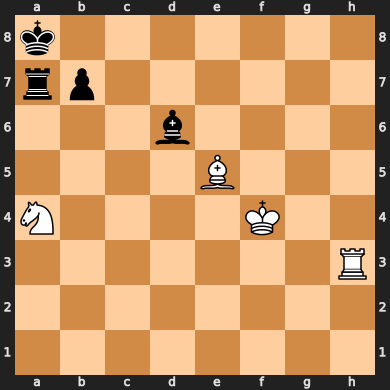

In [11]:
board2 = chess.Board()
chess.Board.clear(board2)
chess.Board.set_piece_at(board2, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board2, chess.A8, chess.Piece.from_symbol('k'))

chess.Board.set_piece_at(board2, chess.A4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board2, chess.E5, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board2, chess.H3, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board2, chess.A7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board2, chess.B7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board2, chess.D6, chess.Piece.from_symbol('b'))


board2



In [14]:
play_game(compMove, random_player, board2, visual='svg', pause=3)

(None, 'Game interrupted!', Board('k7/rp6/1N1b4/4B3/5K2/7R/8/8 b - - 1 1'))

original board:


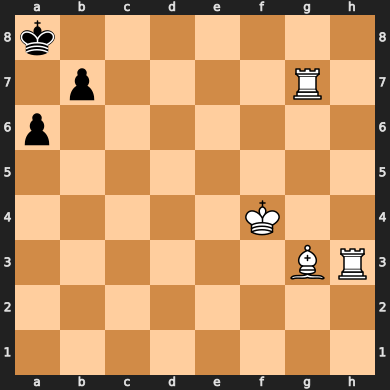

In [15]:
board3 = chess.Board()
chess.Board.clear(board3)
chess.Board.set_piece_at(board3, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board3, chess.A8, chess.Piece.from_symbol('k'))



chess.Board.set_piece_at(board3, chess.H3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board3, chess.G3, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board3, chess.G7, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board3, chess.A6, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board3, chess.B7, chess.Piece.from_symbol('p'))


print('original board:')
board3




In [16]:
play_game(compMove, random_player, board3, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('7R/kp4R1/p7/8/5K2/8/5B2/8 b - - 3 2'))

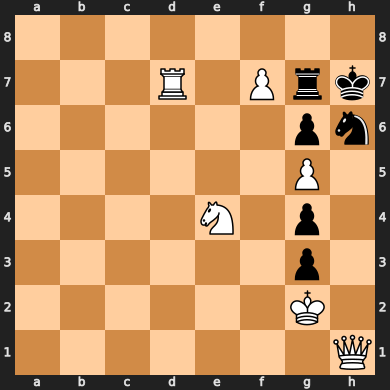

In [17]:
board1 = chess.Board()
chess.Board.clear(board1)
chess.Board.set_piece_at(board1, chess.H7, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board1, chess.G2, chess.Piece.from_symbol('K'))

chess.Board.set_piece_at(board1, chess.H1, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board1, chess.D7, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board1, chess.E4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board1, chess.F7, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board1, chess.G5, chess.Piece.from_symbol('P'))



chess.Board.set_piece_at(board1, chess.H6, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board1, chess.G7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board1, chess.G6, chess.Piece.from_symbol('p'))

chess.Board.set_piece_at(board1, chess.G4, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board1, chess.G3, chess.Piece.from_symbol('p'))


#print('original board:')
board1



In [20]:
play_game(compMove, compMove_escape, board1, visual='svg', pause=0.5)

(None,
 'Game interrupted!',
 Board('3R2r1/5P1k/6pn/6P1/4N1p1/6p1/6K1/7Q w - - 2 2'))

<b>Unforced checkmate using original AI:</b>

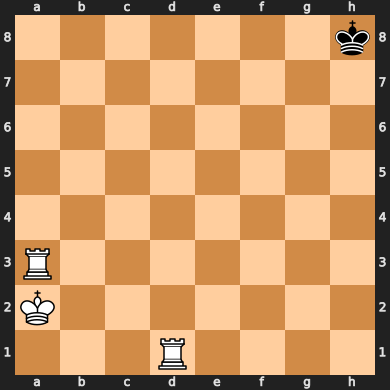

In [39]:
board4 = chess.Board()
chess.Board.clear(board4)
chess.Board.set_piece_at(board4, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board4, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board4, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board4, chess.D1,chess.Piece.from_symbol('R'))


board4


In [40]:
play_game(compMove, compMove_escape, board4, visual='svg', pause=0.5)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('3R3k/2R5/8/8/8/8/K7/8 b - - 9 5'))

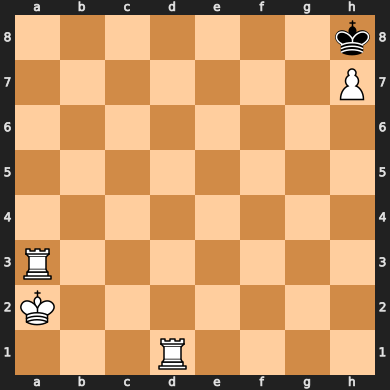

In [41]:
board5 = chess.Board()
chess.Board.clear(board5)
chess.Board.set_piece_at(board5, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board5, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board5, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board5, chess.D1,chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board5, chess.H7,chess.Piece.from_symbol('P'))


board5


In [42]:
play_game(compMove, compMove_escape, board5, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('7k/8/8/8/6R1/8/K7/7R b - - 7 5'))

<b>AI fixed confusing depth first search:</b>

In [108]:
#PRINt TREE VERSION

#comp move uses minimax algorithm (chess one)
def compMove_actual_depth(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    
    #keep track of number of first tree nodes
    comp_count = 1
    
    for move in moves:
        newboard = board.copy()
        newboard.push(move)
        
        #to visualise tree 1st move
        #print('comp node number:', comp_count)
        #print('a first comp tree node:')
        #print(newboard)
        comp_count +=1
        #print('current best score:', bestScore)
              
        score = minimax_actual_depth(newboard, 1, False)
        newboard = board.copy()

        if (score > bestScore):
            bestScore = score
            bestMove = move
            
    return bestMove.uci()

#defines minimax algorithm
def minimax_actual_depth(board, depth, isMaximizing):
    maxDepth = 4
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return 1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return -1
    elif board.can_claim_draw():
        return -1
    elif board.is_fivefold_repetition():
        return -1
    elif depth == maxDepth: #this now changed so finishes at that maxdepth not one greater
        return -1
    
    #else:
        #print('no terminal state yet')

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
        
            score = minimax_actual_depth(newboard, depth + 1, False)
            
            newboard = board.copy() #remove move
            
            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax_actual_depth(newboard, depth + 1, True)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore


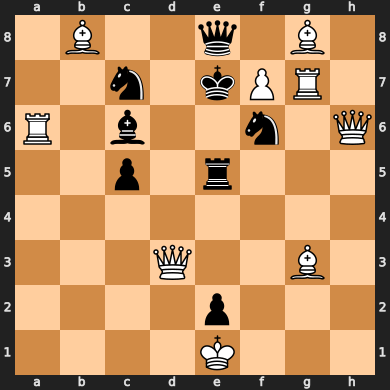

In [106]:
board8 = chess.Board()
chess.Board.clear(board8)
chess.Board.set_piece_at(board8, chess.B8, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.F7, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.G8, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.G7, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.A6, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.H6, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board8, chess.G3, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.E1, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board8, chess.E8, chess.Piece.from_symbol('q'))
chess.Board.set_piece_at(board8, chess.D3, chess.Piece.from_symbol('Q'))

chess.Board.set_piece_at(board8, chess.C7, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board8, chess.C6, chess.Piece.from_symbol('b'))
chess.Board.set_piece_at(board8, chess.E7, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board8, chess.F6, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board8, chess.C5, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.E5, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board8, chess.E2, chess.Piece.from_symbol('p'))



board8


In [107]:
play_game(compMove_actual_depth, random_player, board8, visual='svg', pause=3)

(None,
 'Game interrupted!',
 Board('1B3QB1/2n3R1/R1bk1n1Q/4r3/2p5/6B1/4p3/4K3 b - - 1 3'))

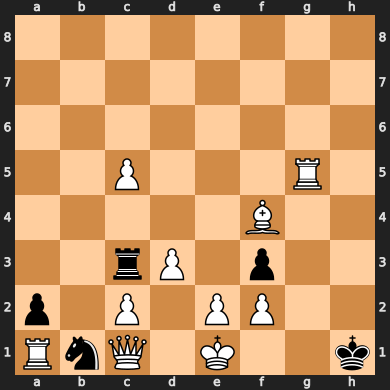

In [86]:
board8 = chess.Board()
chess.Board.clear(board8)
chess.Board.set_piece_at(board8, chess.C5, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.G5, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.F4, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.D3, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.C2, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.E2, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.F2, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.A1, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.C1, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board8, chess.E1, chess.Piece.from_symbol('K'))



chess.Board.set_piece_at(board8, chess.C3, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board8, chess.F3, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.A2, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.B1, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board8, chess.H1, chess.Piece.from_symbol('k'))



board8

In [87]:
play_game(compMove_actual_depth, random_player, board8, visual='svg', pause=3)

(None,
 'Game interrupted!',
 Board('6R1/8/8/2P5/5B2/3r1p2/p1P1PP2/RnQ1K1k1 b - - 7 5'))

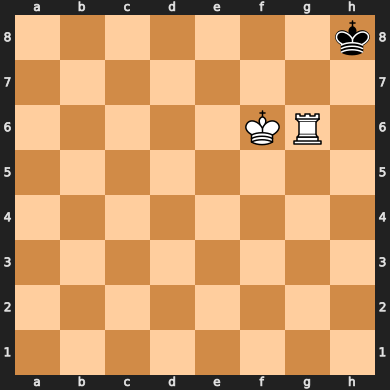

In [79]:
board6 = chess.Board()
chess.Board.clear(board6)
chess.Board.set_piece_at(board6, chess.H8, chess.Piece.from_symbol('k'))


chess.Board.set_piece_at(board6, chess.F6, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board6, chess.G6, chess.Piece.from_symbol('R'))


board6


In [80]:
play_game(compMove_actual_depth, random_player, board6, visual='svg', pause=3)

(None, 'Game interrupted!', Board('6R1/7k/5K2/8/8/8/8/8 w - - 2 2'))

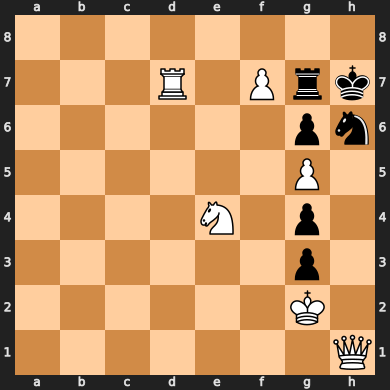

In [20]:
board1 = chess.Board()
chess.Board.clear(board1)
chess.Board.set_piece_at(board1, chess.H7, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board1, chess.G2, chess.Piece.from_symbol('K'))

chess.Board.set_piece_at(board1, chess.H1, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board1, chess.D7, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board1, chess.E4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board1, chess.F7, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board1, chess.G5, chess.Piece.from_symbol('P'))



chess.Board.set_piece_at(board1, chess.H6, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board1, chess.G7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board1, chess.G6, chess.Piece.from_symbol('p'))

chess.Board.set_piece_at(board1, chess.G4, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board1, chess.G3, chess.Piece.from_symbol('p'))


#print('original board:')
board1



In [21]:
play_game(compMove_actual_depth, random_player, board1, visual='svg', pause=3)

(None,
 'Game interrupted!',
 Board('5Rr1/5Pk1/6pn/6P1/4N1p1/6p1/6K1/7Q w - - 4 3'))

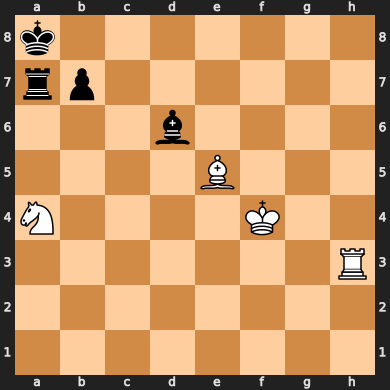

In [109]:
board2 = chess.Board()
chess.Board.clear(board2)
chess.Board.set_piece_at(board2, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board2, chess.A8, chess.Piece.from_symbol('k'))

chess.Board.set_piece_at(board2, chess.A4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board2, chess.E5, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board2, chess.H3, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board2, chess.A7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board2, chess.B7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board2, chess.D6, chess.Piece.from_symbol('b'))


board2



In [110]:
play_game(compMove_actual_depth, random_player, board2, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('1k6/rp6/1N1B4/8/5K2/7R/8/8 b - - 0 2'))

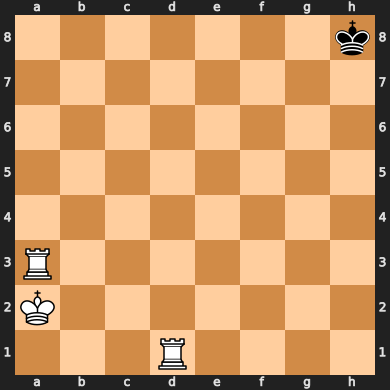

In [38]:
board4 = chess.Board()
chess.Board.clear(board4)
chess.Board.set_piece_at(board4, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board4, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board4, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board4, chess.D1,chess.Piece.from_symbol('R'))


board4


In [39]:
play_game(compMove_actual_depth, random_player, board4, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('3R1k2/2R5/8/8/8/8/K7/8 b - - 5 3'))

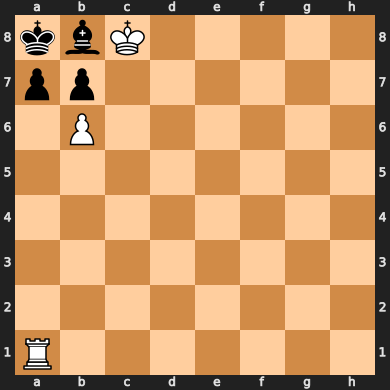

In [53]:
board8 = chess.Board()
chess.Board.clear(board8)
chess.Board.set_piece_at(board8, chess.A8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board8, chess.B8, chess.Piece.from_symbol('b'))
chess.Board.set_piece_at(board8, chess.A7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.B7, chess.Piece.from_symbol('p'))

chess.Board.set_piece_at(board8, chess.B6, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.C8, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board8, chess.A1, chess.Piece.from_symbol('R'))


board8


In [54]:
play_game(compMove_actual_depth, random_player, board8, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('k1K5/Rp6/1P6/8/5b2/8/8/8 b - - 0 2'))

<b>Do breadth first search:</b>

In [13]:
#working version 1

#comp move uses minimax algorithm (chess one)
def compMove_breadth2(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    
    #keep track of number of first tree nodes
    comp_count = 1
    
    for move in moves:
        newboard = board.copy()
        newboard.push(move)
        
        #to visualise tree 1st move
        #print('comp node number:', comp_count)
        #print('a first comp tree node:')
        #print(newboard)
        comp_count +=1
        #print('current best score:', bestScore)
        
        current_maxDepth = 1      
        
        score = minimax_breadth2(newboard, 1, False, current_maxDepth)
                 
        #if score == -5:
         #   initial_maxDepth = 3
         #   score = minimax_breadth2(newboard, 1, False, initial_maxDepth)
            
        newboard = board.copy()
        
        if (score > bestScore):
            bestScore = score
            bestMove = move
            
    if bestScore != 1:
        for move in moves:
            newboard = board.copy()
            newboard.push(move)

            comp_count +=1     

            score = minimax_breadth2(newboard, 1, False, current_maxDepth + 1)
            
            newboard = board.copy()
        
            if (score > bestScore):
                bestScore = score
                bestMove = move

    if bestScore != 1:
        for move in moves:
            newboard = board.copy()
            newboard.push(move)

            comp_count +=1     

            score = minimax_breadth2(newboard, 1, False, current_maxDepth + 2)
            
            newboard = board.copy()
        
            if (score > bestScore):
                bestScore = score
                bestMove = move
        
            
    return bestMove.uci()

#defines minimax algorithm
def minimax_breadth2(board, depth, isMaximizing, maxDepth):
    current_maxDepth = maxDepth
    
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return 1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return -1
    elif board.can_claim_draw():
        return -1
    elif board.is_fivefold_repetition():
        return -1
    elif depth == current_maxDepth: #this now changed so finishes at that maxdepth not one greater        
        #initial_maxDepth = current_maxDepth + 1
        #score = minimax_breadth2_depth3(board, 1, False, 3)
        #score = minimax_breadth2(board, 1, False, initial_maxDepth)
        return -1
    
    #else:
        #print('no terminal state yet')

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
        
            score = minimax_breadth2(newboard, depth + 1, False, current_maxDepth)
            
            newboard = board.copy() #remove move
            
            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax_breadth2(newboard, depth + 1, True, current_maxDepth)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore


In [14]:
#version 2 (working) # checks all moves to depth 1 then all moves to depth 3

#comp move uses minimax algorithm (chess one)
def compMove_breadth2(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    current_maxDepth = 1
                     
    while bestScore != 1: #so no checkmate found in one move
        for move in moves:
            newboard = board.copy()
            newboard.push(move)

            score = minimax_breadth2(newboard, 1, False, current_maxDepth)
            
            current_maxDepth = 3
            newboard = board.copy()
        
            if (score > bestScore):
                bestScore = score
                bestMove = move
        
            
    return bestMove.uci()

#defines minimax algorithm
def minimax_breadth2(board, depth, isMaximizing, maxDepth):
    current_maxDepth = maxDepth
    
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return 1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return -1
    elif board.can_claim_draw():
        return -1
    elif board.is_fivefold_repetition():
        return -1
    elif depth == current_maxDepth: #this now changed so finishes at that maxdepth not one greater        
        #initial_maxDepth = current_maxDepth + 1
        #score = minimax_breadth2_depth3(board, 1, False, 3)
        #score = minimax_breadth2(board, 1, False, initial_maxDepth)
        return -1
    
    #else:
        #print('no terminal state yet')

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
        
            score = minimax_breadth2(newboard, depth + 1, False, current_maxDepth)
            
            newboard = board.copy() #remove move
            
            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax_breadth2(newboard, depth + 1, True, current_maxDepth)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore


In [111]:
#version 2 (working) #iterate through all depths untill shortest checkmate found (BEST AND FINAL MODEL)

#comp move uses minimax algorithm (chess one)
def compMove_breadth2(board):
    moves = list(board.legal_moves)
    bestScore = -math.inf
    bestMove = 0
    current_maxDepth = 1
                     
    while bestScore != 1: #so no checkmate found in one move
        for move in moves:
            newboard = board.copy()
            newboard.push(move)

            score = minimax_breadth2(newboard, 1, False, current_maxDepth)
            
            #current_maxDepth = current_maxDepth + 1
            
            newboard = board.copy()
        
            if (score > bestScore):
                bestScore = score
                bestMove = move
                
        current_maxDepth = current_maxDepth + 1
            
    return bestMove.uci()

#defines minimax algorithm
def minimax_breadth2(board, depth, isMaximizing, maxDepth):
    current_maxDepth = maxDepth
    
    moves = list(board.legal_moves)

    if chess.Board.is_checkmate(board) == True:
        #print('CHECKMATE FOUND')
        return 1
    #elif (checkWhichMarkWon(player)):
        #return -1
    elif chess.Board.is_stalemate(board) == True:
        #print('STALEMATE FOUND')
        return -1
    elif board.can_claim_draw():
        return -1
    elif board.is_fivefold_repetition():
        return -1
    elif depth == current_maxDepth: #this now changed so finishes at that maxdepth not one greater        
        #initial_maxDepth = current_maxDepth + 1
        #score = minimax_breadth2_depth3(board, 1, False, 3)
        #score = minimax_breadth2(board, 1, False, initial_maxDepth)
        return -1
    
    #else:
        #print('no terminal state yet')

    if (isMaximizing):
        bestScore = -math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('maximising below comp node', 'depth:', depth, ', trial board move:')
            #print(newboard)
        
            score = minimax_breadth2(newboard, depth + 1, False, current_maxDepth)
            
            newboard = board.copy() #remove move
            
            if (score > bestScore):
                bestScore = score

        return bestScore
        

    else:
        bestScore = math.inf
        for move in moves:
            newboard = board.copy()
            newboard.push(move)
            
            #to visualise move tree
            #print('minimising below comp node','depth:', depth, ', trial board move:')
            #print(newboard)
            

            score = minimax_breadth2(newboard, depth + 1, True, current_maxDepth)

            newboard = board.copy() #remove move
          
            if (score < bestScore):
                bestScore = score
        return bestScore


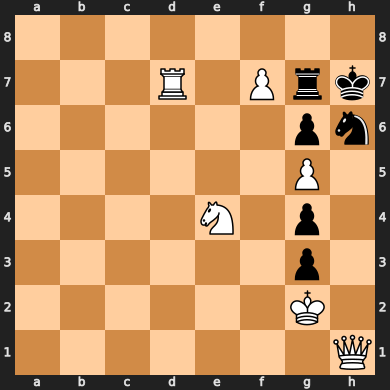

In [112]:
board1 = chess.Board()
chess.Board.clear(board1)
chess.Board.set_piece_at(board1, chess.H7, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board1, chess.G2, chess.Piece.from_symbol('K'))

chess.Board.set_piece_at(board1, chess.H1, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board1, chess.D7, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board1, chess.E4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board1, chess.F7, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board1, chess.G5, chess.Piece.from_symbol('P'))



chess.Board.set_piece_at(board1, chess.H6, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board1, chess.G7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board1, chess.G6, chess.Piece.from_symbol('p'))

chess.Board.set_piece_at(board1, chess.G4, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board1, chess.G3, chess.Piece.from_symbol('p'))


#print('original board:')
board1



In [114]:
play_game(compMove_breadth2, compMove_escape, board1, visual='svg', pause=0.5)

checkmate: White wins!


(True,
 'checkmate: White wins!',
 Board('8/3R1Prk/6pQ/6P1/4N1p1/6p1/6K1/8 b - - 0 1'))

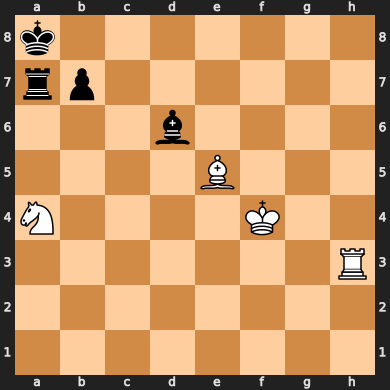

In [116]:
board2 = chess.Board()
chess.Board.clear(board2)
chess.Board.set_piece_at(board2, chess.F4, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board2, chess.A8, chess.Piece.from_symbol('k'))

chess.Board.set_piece_at(board2, chess.A4, chess.Piece.from_symbol('N'))
chess.Board.set_piece_at(board2, chess.E5, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board2, chess.H3, chess.Piece.from_symbol('R'))



chess.Board.set_piece_at(board2, chess.A7, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board2, chess.B7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board2, chess.D6, chess.Piece.from_symbol('b'))


board2



In [117]:
play_game(compMove_breadth2, random_player, board2, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('1k6/rp6/1N1B4/8/5K2/7R/8/8 b - - 0 2'))

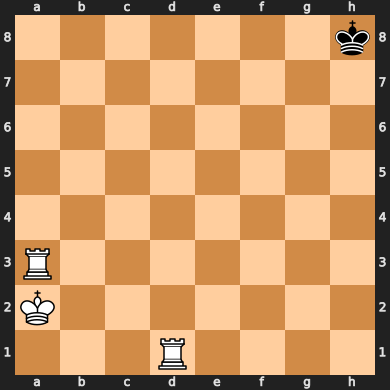

In [37]:
board4 = chess.Board()
chess.Board.clear(board4)
chess.Board.set_piece_at(board4, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board4, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board4, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board4, chess.D1,chess.Piece.from_symbol('R'))


board4


In [38]:
play_game(compMove_breadth2, random_player, board4, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('3R2k1/R7/8/8/8/8/K7/8 b - - 3 2'))

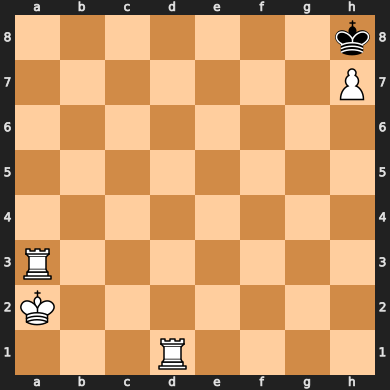

In [39]:
board5 = chess.Board()
chess.Board.clear(board5)
chess.Board.set_piece_at(board5, chess.H8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board5, chess.A2, chess.Piece.from_symbol('K'))


chess.Board.set_piece_at(board5, chess.A3, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board5, chess.D1,chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board5, chess.H7,chess.Piece.from_symbol('P'))


board5


In [40]:
play_game(compMove_breadth2, random_player, board5, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('8/7k/8/8/8/6R1/K7/7R b - - 1 2'))

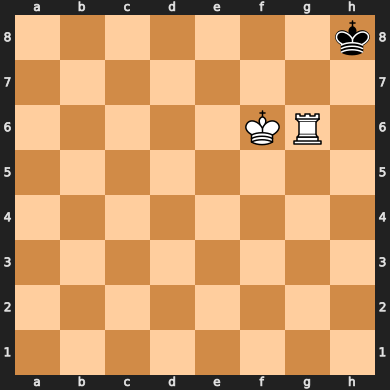

In [61]:
board6 = chess.Board()
chess.Board.clear(board6)
chess.Board.set_piece_at(board6, chess.H8, chess.Piece.from_symbol('k'))


chess.Board.set_piece_at(board6, chess.F6, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board6, chess.G6, chess.Piece.from_symbol('R'))


board6


In [24]:
play_game(compMove_breadth2, random_player, board6, visual='svg', pause=1)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('5k1R/8/5K2/8/8/8/8/8 b - - 5 3'))

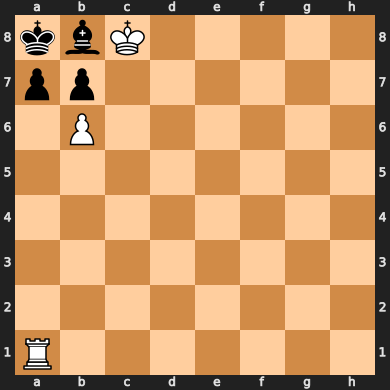

In [33]:
board8 = chess.Board()
chess.Board.clear(board8)
chess.Board.set_piece_at(board8, chess.A8, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board8, chess.B8, chess.Piece.from_symbol('b'))
chess.Board.set_piece_at(board8, chess.A7, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.B7, chess.Piece.from_symbol('p'))

chess.Board.set_piece_at(board8, chess.B6, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.C8, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board8, chess.A1, chess.Piece.from_symbol('R'))


board8


In [34]:
play_game(compMove_breadth2, random_player, board8, visual='svg', pause=3)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('kbK5/pP6/p7/8/8/8/8/8 b - - 0 2'))

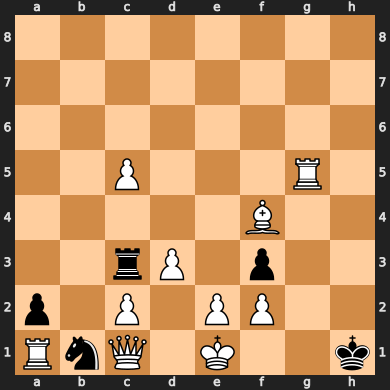

In [93]:
board8 = chess.Board()
chess.Board.clear(board8)
chess.Board.set_piece_at(board8, chess.C5, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.G5, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.F4, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.D3, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.C2, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.E2, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.F2, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.A1, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.C1, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board8, chess.E1, chess.Piece.from_symbol('K'))



chess.Board.set_piece_at(board8, chess.C3, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board8, chess.F3, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.A2, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.B1, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board8, chess.H1, chess.Piece.from_symbol('k'))



board8


In [94]:
play_game(compMove_breadth2, random_player, board8, visual='svg', pause=3)

(None,
 'Game interrupted!',
 Board('8/8/8/2P3R1/5B2/2rP1p2/p1P1PP2/RnQ1K2k w - - 0 1'))

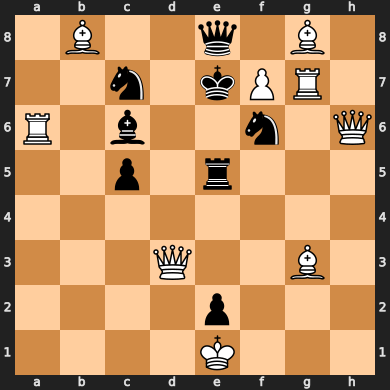

In [91]:
board8 = chess.Board()
chess.Board.clear(board8)
chess.Board.set_piece_at(board8, chess.B8, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.F7, chess.Piece.from_symbol('P'))
chess.Board.set_piece_at(board8, chess.G8, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.G7, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.A6, chess.Piece.from_symbol('R'))
chess.Board.set_piece_at(board8, chess.H6, chess.Piece.from_symbol('Q'))
chess.Board.set_piece_at(board8, chess.G3, chess.Piece.from_symbol('B'))
chess.Board.set_piece_at(board8, chess.E1, chess.Piece.from_symbol('K'))
chess.Board.set_piece_at(board8, chess.E8, chess.Piece.from_symbol('q'))
chess.Board.set_piece_at(board8, chess.D3, chess.Piece.from_symbol('Q'))

chess.Board.set_piece_at(board8, chess.C7, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board8, chess.C6, chess.Piece.from_symbol('b'))
chess.Board.set_piece_at(board8, chess.E7, chess.Piece.from_symbol('k'))
chess.Board.set_piece_at(board8, chess.F6, chess.Piece.from_symbol('n'))
chess.Board.set_piece_at(board8, chess.C5, chess.Piece.from_symbol('p'))
chess.Board.set_piece_at(board8, chess.E5, chess.Piece.from_symbol('r'))
chess.Board.set_piece_at(board8, chess.E2, chess.Piece.from_symbol('p'))



board8


In [92]:
play_game(compMove_breadth2, random_player, board8, visual='svg', pause=3)

(None,
 'Game interrupted!',
 Board('1B2q1B1/2n1kPR1/R1b2n1Q/2p1r3/8/3Q2B1/4p3/4K3 w - - 0 1'))